# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

In [2]:
display(df_weather.head())

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR
0,2019-01-01,9,4,5.1
1,2019-01-02,8,5,8.7
2,2019-01-03,6,0,8.7
3,2019-01-04,5,-1,5.1
4,2019-01-05,6,-1,8.7


# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python. Do you remember that you can do Linear regression with NumPy ? You can do the same with Scikit-Learn. And many other things!
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

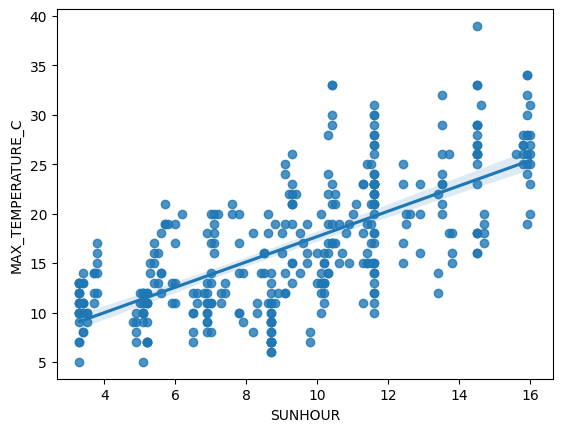

In [3]:
# Your code here :

sns.regplot(x='SUNHOUR', y='MAX_TEMPERATURE_C', data=df_weather)
plt.show()

## Train the model
You just have to read and execute the code below

In [4]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']]

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C']

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)

## Explore the model

In [5]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
intercept : 4.8472953557195435


## Prediction for 1 value

In [6]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]]

*Why ? We'll see that in the next quest.*

In [7]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
df_weather["PREDICT"] = modelLR.predict(df_weather[['SUNHOUR']])

In [8]:
display(df_weather.head())

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,PREDICT
0,2019-01-01,9,4,5.1,11.396823
1,2019-01-02,8,5,8.7,16.020019
2,2019-01-03,6,0,8.7,16.020019
3,2019-01-04,5,-1,5.1,11.396823
4,2019-01-05,6,-1,8.7,16.020019


In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               365 non-null    object 
 1   MAX_TEMPERATURE_C  365 non-null    int64  
 2   MIN_TEMPERATURE_C  365 non-null    int64  
 3   SUNHOUR            365 non-null    float64
 4   PREDICT            365 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.4+ KB


## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is now stored in a column, you can now visualize it.

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

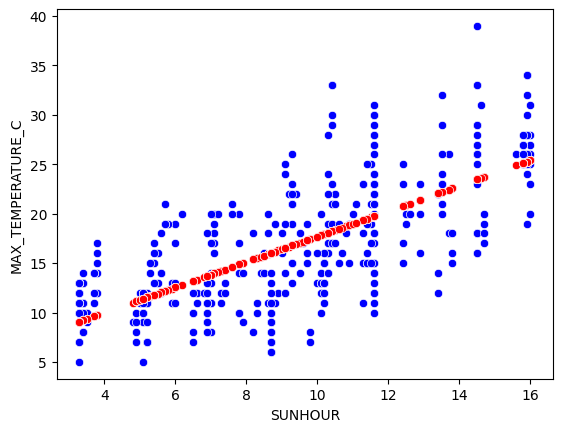

In [10]:
# Your code here :

sns.scatterplot(data = df_weather,
                x = "SUNHOUR",
                y = "MAX_TEMPERATURE_C",
                color = 'blue')
sns.scatterplot(data = df_weather,
                x = "SUNHOUR",
                y = "PREDICT",
                color = 'red')

plt.show()


Your prediction is stored in a DataFrame. **So, you can visualize your prediction without the "source" column.** Let's try it.
Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

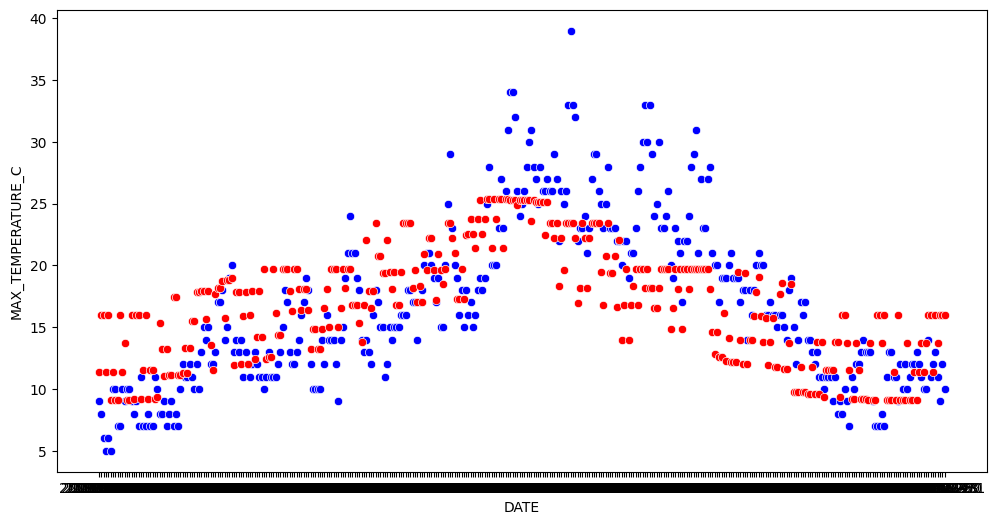

In [11]:
# Your code here :
fig = plt.subplots(figsize = (12, 6))

sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "MAX_TEMPERATURE_C",
                color = 'blue')
sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "PREDICT",
                color = 'red')

plt.show()

Hey, but it doesn't seem linear ! And yet it is...

# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

In [12]:
# Your code here :

X = df_weather[['MIN_TEMPERATURE_C']]
y = df_weather['MAX_TEMPERATURE_C']

modelLR = LinearRegression().fit(X, y)

print("coefficient :",modelLR.coef_)
print("intercept :", modelLR.intercept_)

print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )
print("Scikit-Learn :  ", modelLR.predict([[10]]))

df_weather["PREDICT2"] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C']])

coefficient : [1.22274205]
intercept : 5.689031214578716
By hand : [17.91645172]
Scikit-Learn :   [17.91645172]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

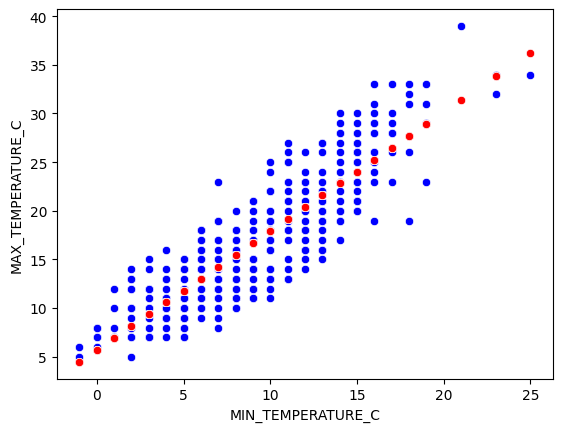

In [13]:
#Your code here :
sns.scatterplot(data = df_weather,
                x = "MIN_TEMPERATURE_C",
                y = "MAX_TEMPERATURE_C",
                color = 'blue')
sns.scatterplot(data = df_weather,
                x = "MIN_TEMPERATURE_C",
                y = "PREDICT2",
                color = 'red')

plt.show()

## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

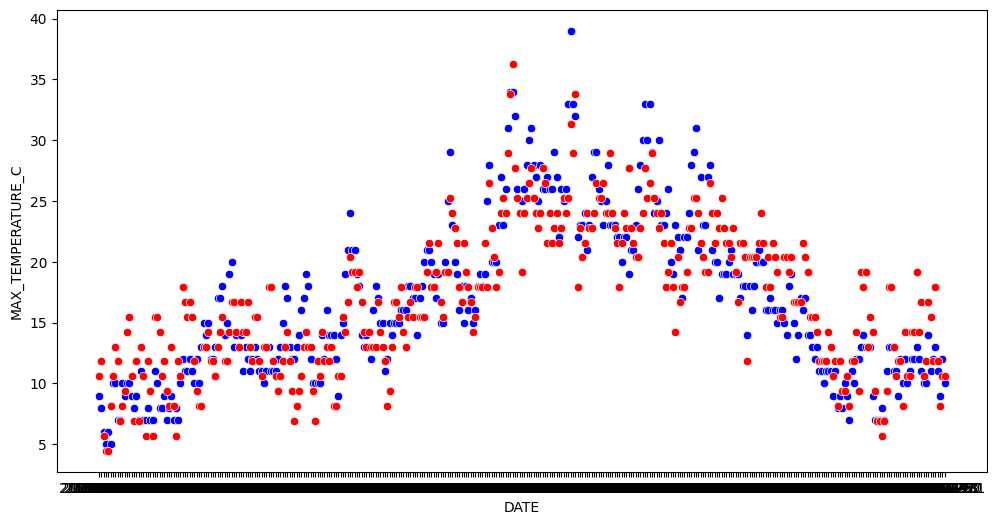

In [14]:
# Your code here :
fig = plt.subplots(figsize = (12, 6))

sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "MAX_TEMPERATURE_C",
                color = 'blue')
sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "PREDICT2",
                color = 'red')

plt.show()